In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Dương Bảo Châu'
!ls

/content/drive/.shortcut-targets-by-id/1xBP49vgC0ID9xnGysLw1YvZa0h6-OSVX/Dương Bảo Châu
Analysis_use_Pandas.ipynb	    housing.data
googleplaystore.csv		    housing.names
Homework10.ipynb		    Untitled1.ipynb
Homework11.ipynb		    winequality.names
Homework12-Linear-Regression.ipynb  winequality-red.csv
Homework8-matplotlib.ipynb	    winequality-white.csv
Homework9-Pandas.ipynb


In [3]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
winequality_white = pd.read_csv('winequality-white.csv', sep = ';')

In [5]:
print(winequality_white.shape)

(4898, 12)


In [6]:
print(winequality_white.dtypes )

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
winequality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
# descriptions
set_option('precision', 2)
print(winequality_white.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        4898.00           4898.00      4898.00         4898.00   
mean            6.85              0.28         0.33            6.39   
std             0.84              0.10         0.12            5.07   
min             3.80              0.08         0.00            0.60   
25%             6.30              0.21         0.27            1.70   
50%             6.80              0.26         0.32            5.20   
75%             7.30              0.32         0.39            9.90   
max            14.20              1.10         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   4.90e+03              4898.00               4898.00  4.90e+03   
mean    4.58e-02                35.31                138.36  9.94e-01   
std     2.18e-02                17.01                 42.50  2.99e-03   
min     9.00e-03                 2.00                  9.00  9.87e-0

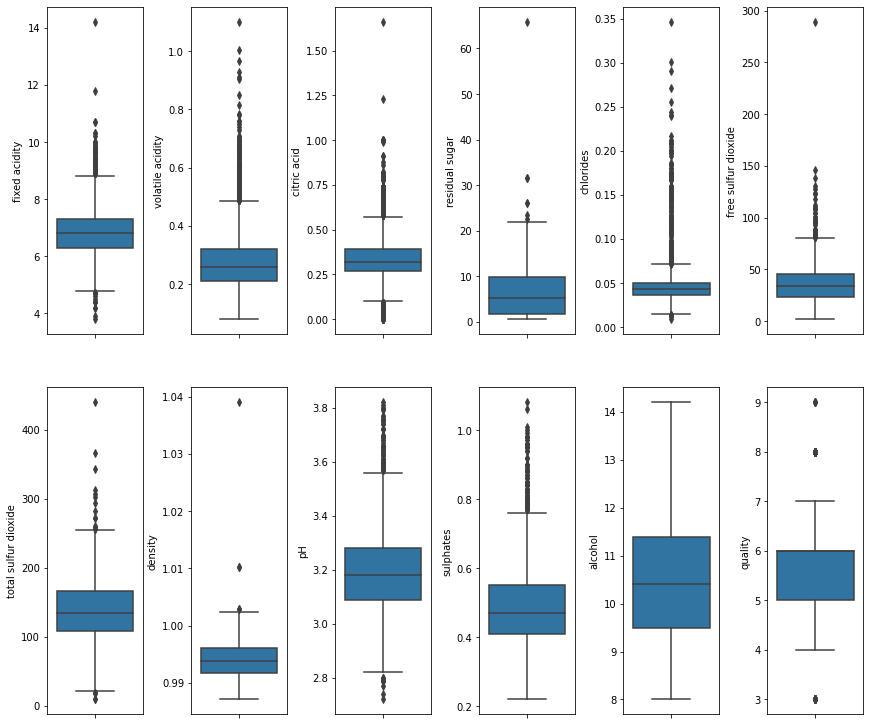

In [9]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in winequality_white.items():
    sns.boxplot(y=k, data=winequality_white, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
for k, v in winequality_white.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 *irq)]
  perc = np.shape(v_col)[0]*100.0 / np.shape(winequality_white)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column fixed acidity outliers = 2.98%
Column volatile acidity outliers = 3.80%
Column citric acid outliers = 5.51%
Column residual sugar outliers = 0.14%
Column chlorides outliers = 4.25%
Column free sulfur dioxide outliers = 1.02%
Column total sulfur dioxide outliers = 0.39%
Column density outliers = 0.10%
Column pH outliers = 1.53%
Column sulphates outliers = 2.53%
Column alcohol outliers = 0.00%
Column quality outliers = 4.08%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

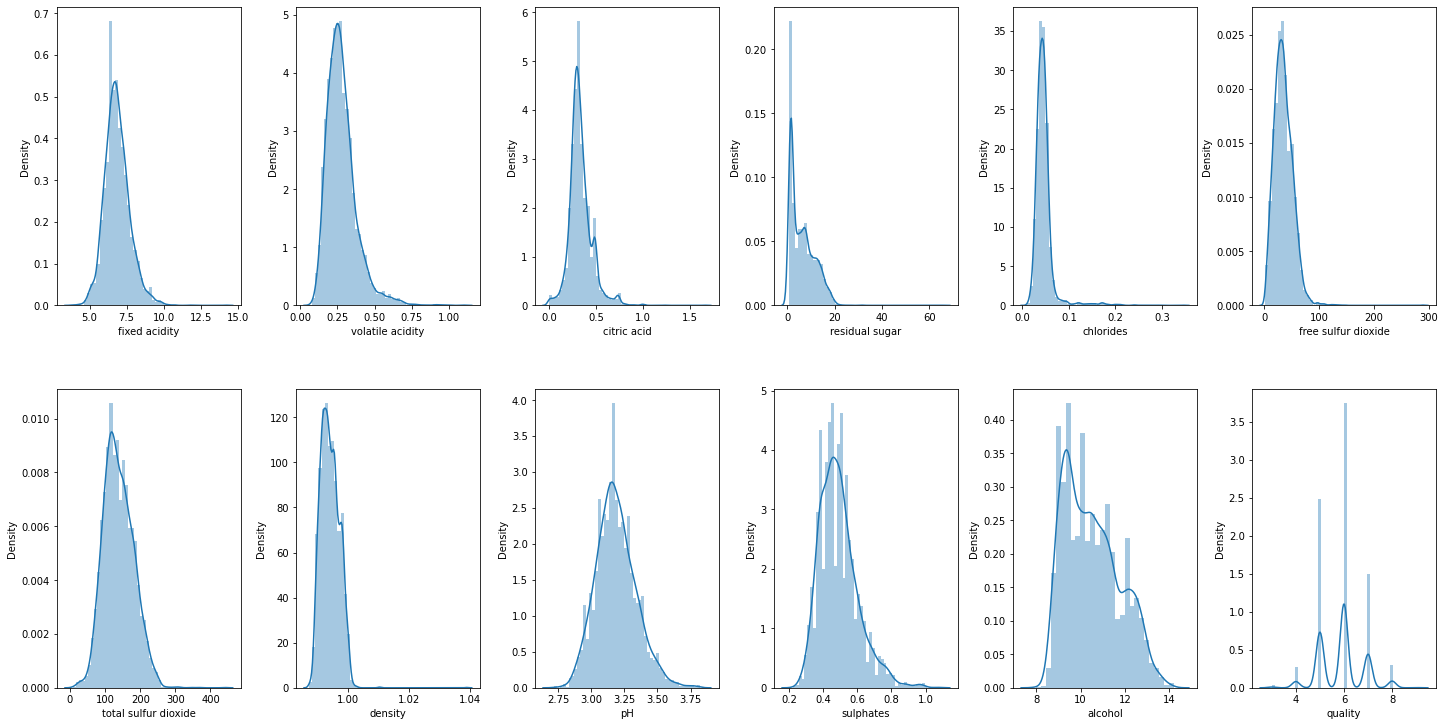

In [11]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0 
axs = axs.flatten()
for k, v in winequality_white.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.plot

The majority of the distribution are approximately normal, while other have some skewness. The wine quality scores 5, 6, 7 are more frequent than others.

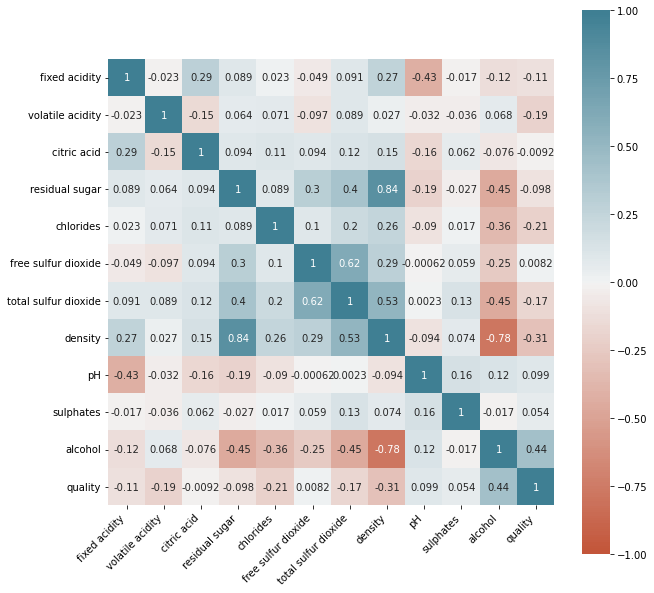

In [12]:
# correlation
set_option('precision', 2)
cor = winequality_white.corr(method='pearson')

# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    cor,
    vmin = -1, vmax = 1, center = 0, 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above correlation heat map, we can infer the wine quality is positively correlated with the alcohol content. On the other hand, density has a considerable negative correlation with quality. 

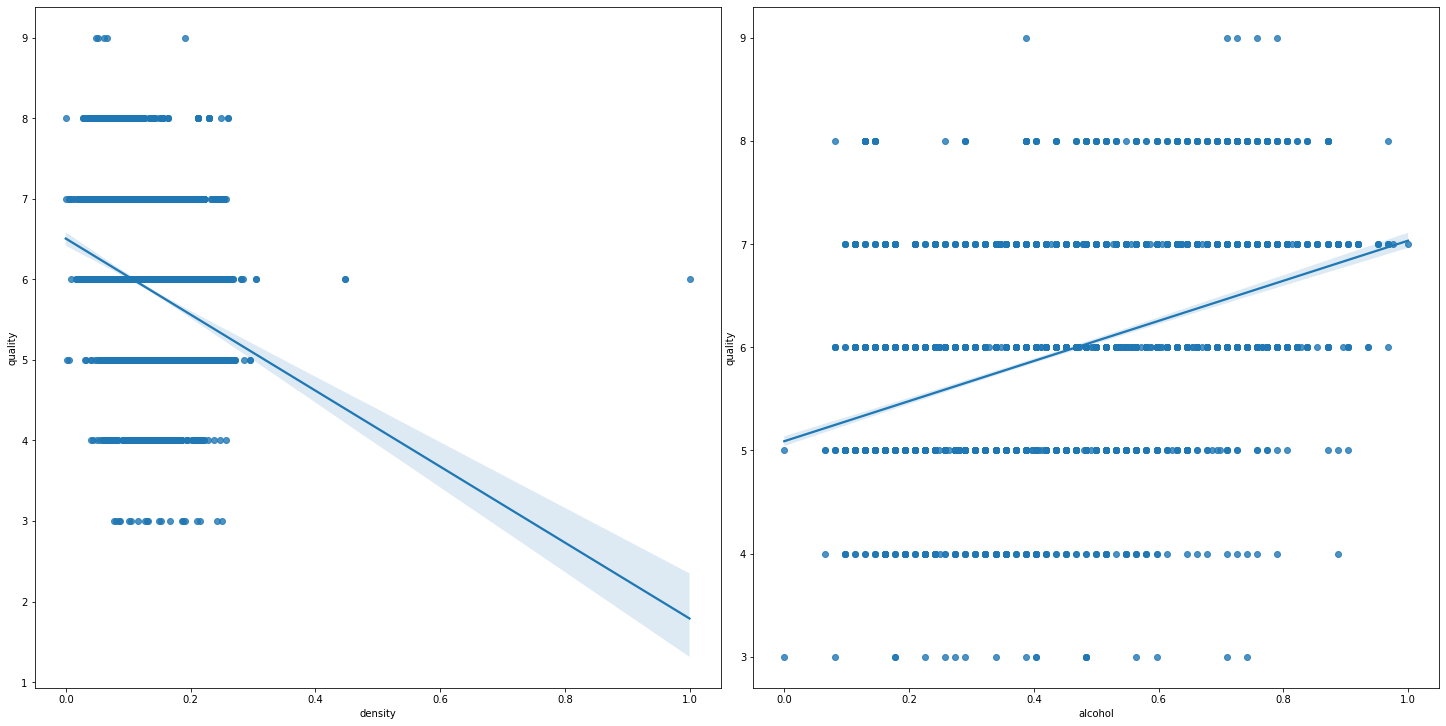

In [13]:
# plot the column "density" and "alcohol"
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['density', 'alcohol']
x = winequality_white.loc[:,column_sels]
y = winequality_white['quality']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Wine quality has a confirmed negative relationship with Density and positive relationship with alcohol.

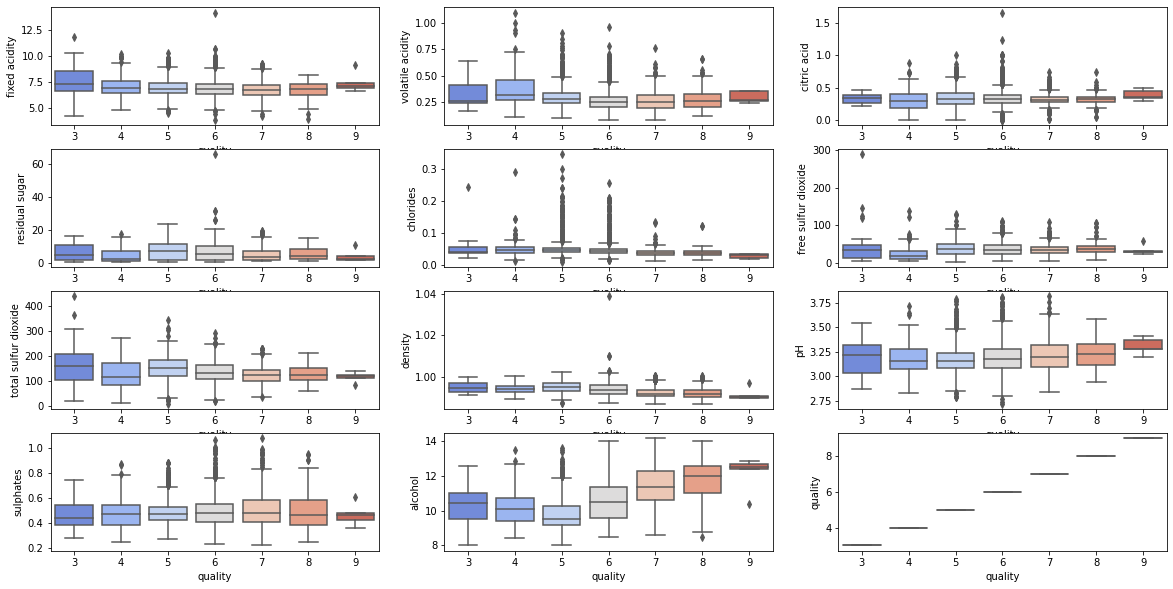

In [14]:
# visualizing the dependency between quality and independent features
cols = winequality_white.columns
cnt = 1
fig = plt.figure(figsize = [20, 10])
for col in cols: 
  plt.subplot(4,3, cnt)
  sns.boxplot(x = 'quality', y=col, data=winequality_white, palette="coolwarm")
  cnt = cnt+1
plt.show()

Let's summarise findings from the above boxplots
- Highly rated wines has comparatively higher alcohol, pH, citric acid 
- On the other hand, wines with high volatile acidicity, density, and total sulfur dioxide are low in quality.


In [15]:
array = winequality_white.values
X = array[:,0:10]
Y = array[:,10]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [16]:
X_train.shape, X_validation.shape

((3918, 10), (980, 10))

In [17]:
# k-fold
num_folds = 10
seed = 7
# neg? mean_squared_error
scoring = 'neg_mean_squared_error'

In [18]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [19]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -0.226234 (0.227464)
LASSO: -1.109079 (0.063605)
EN: -1.078704 (0.067510)
KNN: -1.071367 (0.095241)
CART: -0.253371 (0.031723)
SVR: -1.045646 (0.075432)


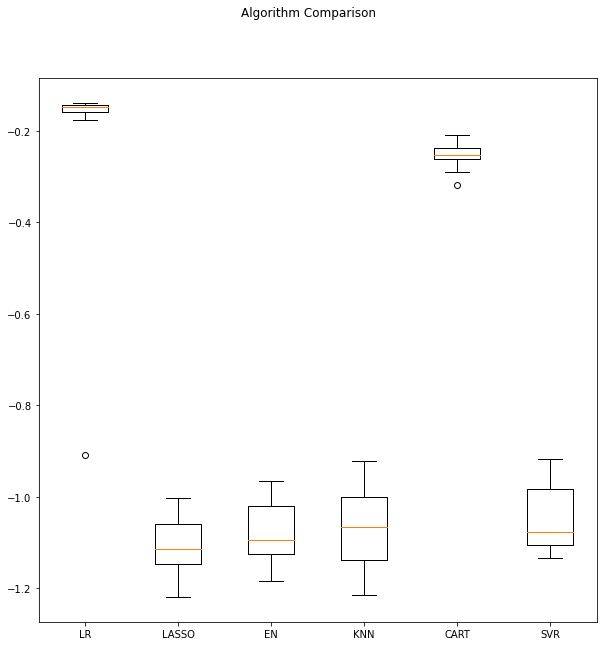

In [20]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [21]:
# Standardize the dataset
# Normalize dữ liệu thì 1 số thuật toán performance tốt hơn, knn, svr
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -0.226234 (0.227464)
ScaledLASSO: -1.508181 (0.056734)
ScaledEN: -1.027791 (0.052355)
ScaledKNN: -0.330164 (0.043032)
ScaledCART: -0.258983 (0.036130)
ScaledSVR: -0.126338 (0.011892)


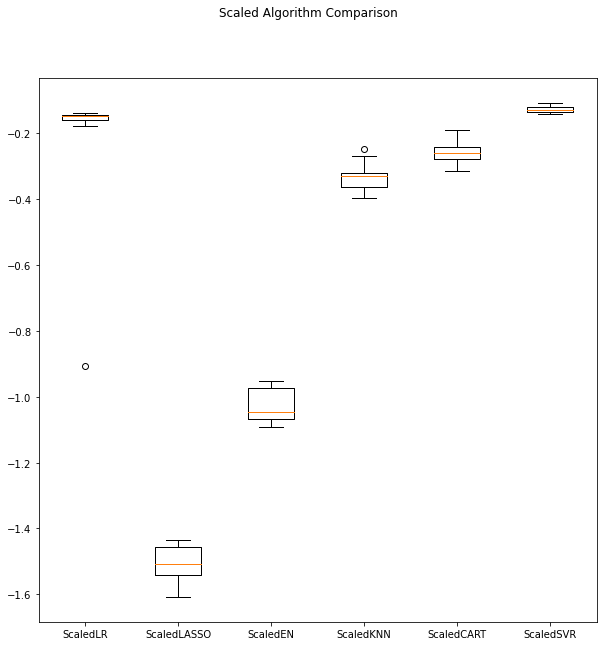

In [22]:
# Compare Algorithms --> SVR
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [23]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVR(kernel='rbf')
model.fit(rescaledX, Y_train)

SVR()

In [24]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.11161375095321846
